In [4]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

## Getting dataframe with features

In [2]:
def get_birds_enum(numQ: bool = True):
    birds = [dirs for _, dirs, _ in os.walk('data')][0]
    return {i: birds[i] for i in range(len(birds))} if numQ else {birds[i]: i for i in range(len(birds))}

def get_all_df() -> pd.DataFrame:
    csv_files = [dirname + '/' + file for dirname, _, files in os.walk('data') for file in files if 'wav.csv' in file]
    df = pd.read_csv('/Users/juggjup/PycharmProjects/sync-files/mad_nbs/birds/data/Dendrocopos/103937.wav.csv', index_col=0)
    columns = ['index'] + list(df.columns)
    df_all = pd.DataFrame(columns=columns)
    birds_enum = get_birds_enum(False)
    for i, file in enumerate(csv_files):
        df = pd.read_csv(file, index_col=0)
        id = file.split('/')[-1].split('.')[0]
        bird = file.split('/')[1]
        df_all.at[i, 'index'] = id
        for column in columns[1:]:
            df_all.at[i, column] = df[column].dropna().to_numpy()
        df_all.at[i, 'target'] = birds_enum[bird]
        print(f'File {i} {file} ready', end='\r')
    return df_all

def export_all_df() -> None:
    df = get_all_df()
    df.to_csv('data/features.csv')

In [125]:
df_all = get_all_df()

In [126]:
feature_columns = df_all.columns[1:-1]

def stat(x):
    try:
        return np.array([x.min(), x.mean(), x.max()])
    except:
        return [0, 0, 0]
    
for column in feature_columns:
    print(column)
    df_all[column] = df_all[column].apply(stat)

s0
s1
s2
s3
s4
s5
s6
s7
s8
s9
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s20
s21
s22
s23
s24
s25
s26
s27
s28
s29
s30
s31
s32
s33
s34
s35
s36
s37
s38
s39
s40
s41
s42
s43
s44
s45
s46
s47
s48
s49
s50
s51
s52
s53
s54
s55
s56
s57
s58
s59
s60
s61
s62
s63
s64
s65
s66
s67
m0
m1
m2
m3
m4
m5
m6
m7
m8
m9
m10
m11
m12
m13
m14
m15
m16
m17
m18
m19
m20
m21
m22
m23
m24
m25
m26
m27
m28
m29
m30
m31
m32
m33
m34
m35
m36
m37
m38
m39
m40
m41
m42
m43
m44
m45
m46
m47
m48
m49
m50
m51
m52
m53
m54
m55
m56
m57
m58
m59
m60
m61
m62
m63
m64
m65
m66
m67
m68
m69
m70
m71
m72
m73
m74
m75
m76
m77
m78
m79
m80
m81
m82
m83
m84
m85
m86
m87
m88
m89
m90
m91
m92
m93
m94
m95
m96
m97
m98
m99
m100
m101
m102
m103
m104
m105
m106
m107
m108
m109
m110
m111
m112
m113
m114
m115
m116
m117
m118
m119
m120
m121
m122
m123
m124
m125
m126
m127
m128
m129
m130
m131
m132
m133
m134
m135


## Logistic regression

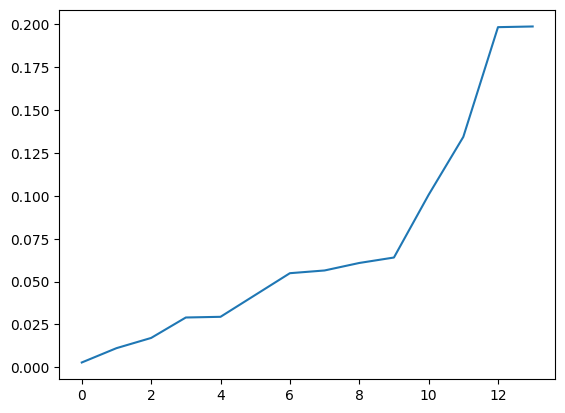

In [127]:
x = df_all['target'].value_counts().sort_values(ignore_index=1)
x = x / x.sum()
plt.plot(x)

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

In [158]:
X = list(map(np.concatenate, df_all.iloc[:, 1:-1].values))
y = df_all['target']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33)

In [199]:
LR = LogisticRegression(solver='newton-cg', class_weight='balanced', random_state=42, max_iter=1000, multi_class='multinomial')

In [200]:
LR.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42,
                   solver='newton-cg')

In [207]:
y_pred = LR.predict_proba(X_test)

In [208]:
from sklearn.metrics import mean_absolute_error as mae, f1_score, roc_auc_score

In [209]:
y_test

2132    11.0
580      2.0
2491    13.0
835      3.0
1050     7.0
        ... 
778      3.0
959      6.0
2493    13.0
1968    11.0
1020     6.0
Name: target, Length: 830, dtype: float64

In [210]:
y_pred

array([[5.32877527e-02, 5.99199972e-02, 9.91821656e-02, ...,
        2.48219233e-02, 6.56711469e-02, 8.80212557e-05],
       [2.30283253e-01, 1.41055248e-02, 3.41825342e-02, ...,
        8.82125974e-02, 6.30141232e-02, 4.42212048e-05],
       [1.29967925e-03, 4.68742203e-04, 1.43430149e-01, ...,
        8.86062976e-02, 6.96597283e-02, 4.63580374e-03],
       ...,
       [4.04449892e-02, 6.95051791e-04, 9.84374785e-03, ...,
        1.20019986e-01, 1.44823537e-02, 2.75563875e-02],
       [3.50021143e-02, 2.11008377e-03, 8.57635788e-03, ...,
        7.68458116e-01, 2.76638560e-04, 1.81699572e-03],
       [2.48558296e-01, 2.31746680e-02, 2.45927186e-03, ...,
        9.91020283e-02, 1.42929731e-03, 6.44722112e-03]])

In [211]:
roc_auc_score(y_test.values, y_pred, multi_class='ovr')

0.8144446049990623

In [212]:
f1_score(y_test, LR.predict(X_test), average='weighted')

0.44120880825883263